In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Loading data:

In [2]:
forest_files=pd.read_csv("C:\\Users\\JOTHISH N\\Desktop\\DS\\NEUTRAL NETWORK\\forestfires.csv")

In [3]:
forest_files

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


### Checking for null values in the data:

In [4]:
forest_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

There are no null values in the data:

### Distributions of the independant features:

<AxesSubplot:xlabel='area', ylabel='Density'>

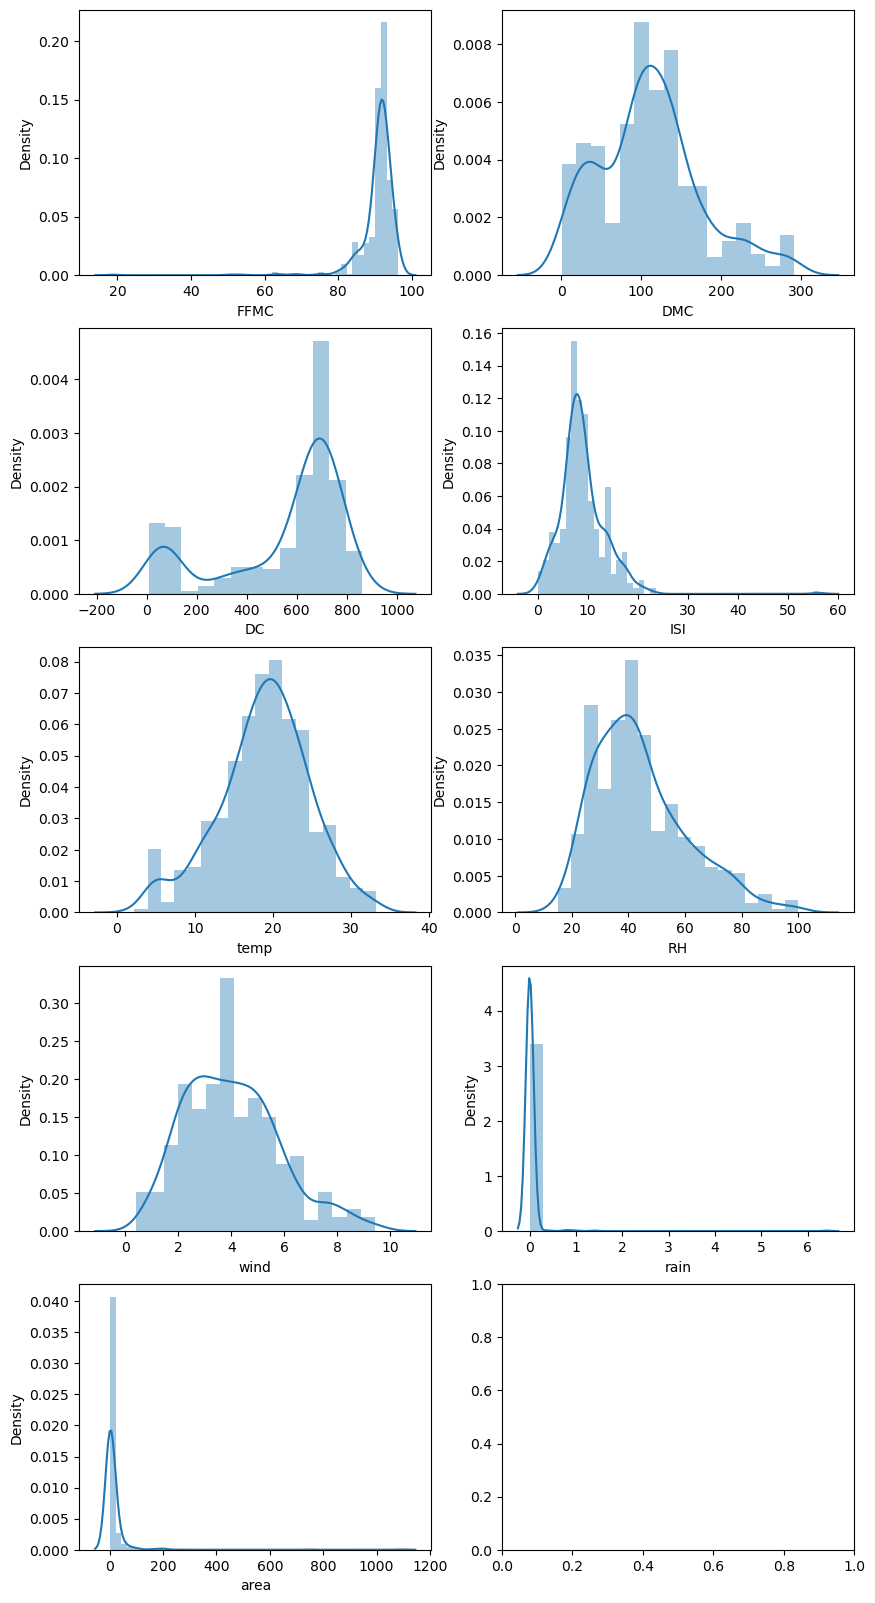

In [5]:
fig,axs=plt.subplots(5,2,figsize=(10,20))
sns.distplot(forest_files.FFMC,ax=axs[0,0])
sns.distplot(forest_files.DMC,ax=axs[0,1])
sns.distplot(forest_files.DC,ax=axs[1,0])
sns.distplot(forest_files.ISI,ax=axs[1,1])
sns.distplot(forest_files.temp,ax=axs[2,0])
sns.distplot(forest_files.RH,ax=axs[2,1])
sns.distplot(forest_files.wind,ax=axs[3,0])
sns.distplot(forest_files.rain,ax=axs[3,1])
sns.distplot(forest_files.area,ax=axs[4,0])

In [6]:
forest_files.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

### Label encoding the size category column:

In [7]:
forest_files.loc[forest_files.size_category=='small','size_category']=0
forest_files.loc[forest_files.size_category=='large','size_category']=1

In [8]:
forest_files

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,1
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### Dropping month and day columns since they are already present as dummy columns:

In [9]:
forest_files.drop(['month','day'],axis=1,inplace=True)

In [10]:
forest_files

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting dependant and independant variables:

In [11]:
x=forest_files.iloc[:,:-1]
y=forest_files.iloc[:,-1]

In [12]:
y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 517, dtype: object

In [13]:
y=y.astype('float')

### Using standard scaler:

In [14]:
ss=preprocessing.StandardScaler()

In [15]:
x=ss.fit_transform(x)

### Building model:

In [16]:
model=Sequential()
model.add(Dense(28,  activation='relu'))
model.add(Dense(28,  activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history=model.fit(x, y, validation_split=0.33, epochs=250, batch_size=50)

Epoch 1/250
7/7 [==============================] - 9s 100ms/step - loss: 0.7310 - accuracy: 0.5116 - val_loss: 0.6833 - val_accuracy: 0.5965
Epoch 2/250
7/7 [==============================] - 0s 14ms/step - loss: 0.6633 - accuracy: 0.6098 - val_loss: 0.6564 - val_accuracy: 0.6316
Epoch 3/250
7/7 [==============================] - 0s 14ms/step - loss: 0.6131 - accuracy: 0.7254 - val_loss: 0.6468 - val_accuracy: 0.6842
Epoch 4/250
7/7 [==============================] - 0s 15ms/step - loss: 0.5804 - accuracy: 0.7601 - val_loss: 0.6464 - val_accuracy: 0.6959
Epoch 5/250
7/7 [==============================] - 0s 14ms/step - loss: 0.5577 - accuracy: 0.7717 - val_loss: 0.6503 - val_accuracy: 0.6901
Epoch 6/250
7/7 [==============================] - 0s 26ms/step - loss: 0.5420 - accuracy: 0.7630 - val_loss: 0.6564 - val_accuracy: 0.6901
Epoch 7/250
7/7 [==============================] - 0s 21ms/step - loss: 0.5274 - accuracy: 0.7630 - val_loss: 0.6607 - val_accuracy: 0.6901
Epoch 8/250
7/7 [==

7/7 [==============================] - 0s 14ms/step - loss: 0.1858 - accuracy: 0.9422 - val_loss: 0.7109 - val_accuracy: 0.7895
Epoch 60/250
7/7 [==============================] - 0s 14ms/step - loss: 0.1817 - accuracy: 0.9451 - val_loss: 0.7141 - val_accuracy: 0.7895
Epoch 61/250
7/7 [==============================] - 0s 13ms/step - loss: 0.1773 - accuracy: 0.9451 - val_loss: 0.7137 - val_accuracy: 0.7895
Epoch 62/250
7/7 [==============================] - 0s 17ms/step - loss: 0.1736 - accuracy: 0.9480 - val_loss: 0.7243 - val_accuracy: 0.7953
Epoch 63/250
7/7 [==============================] - 0s 19ms/step - loss: 0.1698 - accuracy: 0.9480 - val_loss: 0.7267 - val_accuracy: 0.8012
Epoch 64/250
7/7 [==============================] - 0s 17ms/step - loss: 0.1654 - accuracy: 0.9480 - val_loss: 0.7259 - val_accuracy: 0.7953
Epoch 65/250
7/7 [==============================] - 0s 15ms/step - loss: 0.1619 - accuracy: 0.9480 - val_loss: 0.7377 - val_accuracy: 0.8012
Epoch 66/250
7/7 [========

7/7 [==============================] - 0s 13ms/step - loss: 0.0490 - accuracy: 0.9798 - val_loss: 1.0305 - val_accuracy: 0.8363
Epoch 118/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0504 - accuracy: 0.9798 - val_loss: 1.0299 - val_accuracy: 0.8363
Epoch 119/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0475 - accuracy: 0.9884 - val_loss: 1.0432 - val_accuracy: 0.8304
Epoch 120/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0463 - accuracy: 0.9884 - val_loss: 1.0519 - val_accuracy: 0.8421
Epoch 121/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0457 - accuracy: 0.9827 - val_loss: 1.0569 - val_accuracy: 0.8363
Epoch 122/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0454 - accuracy: 0.9855 - val_loss: 1.0610 - val_accuracy: 0.8421
Epoch 123/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0435 - accuracy: 0.9942 - val_loss: 1.0658 - val_accuracy: 0.8363
Epoch 124/250
7/7 [=

Epoch 175/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0174 - accuracy: 1.0000 - val_loss: 1.3482 - val_accuracy: 0.8363
Epoch 176/250
7/7 [==============================] - 0s 18ms/step - loss: 0.0172 - accuracy: 1.0000 - val_loss: 1.3536 - val_accuracy: 0.8304
Epoch 177/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 1.3581 - val_accuracy: 0.8304
Epoch 178/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 1.3653 - val_accuracy: 0.8363
Epoch 179/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 1.3689 - val_accuracy: 0.8363
Epoch 180/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 1.3730 - val_accuracy: 0.8304
Epoch 181/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0159 - accuracy: 1.0000 - val_loss: 1.3810 - val_accuracy: 0.8304
Epoch 

Epoch 233/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 1.6197 - val_accuracy: 0.8246
Epoch 234/250
7/7 [==============================] - 0s 23ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 1.6240 - val_accuracy: 0.8246
Epoch 235/250
7/7 [==============================] - 0s 19ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.6263 - val_accuracy: 0.8187
Epoch 236/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 1.6279 - val_accuracy: 0.8246
Epoch 237/250
7/7 [==============================] - 0s 15ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 1.6340 - val_accuracy: 0.8246
Epoch 238/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 1.6448 - val_accuracy: 0.8187
Epoch 239/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 1.6399 - val_accuracy: 0.8246
Epoch 

In [19]:
model.evaluate(x,y)

17/17 [==============================] - 0s 3ms/step - loss: 0.5621 - accuracy: 0.9381


[0.5620965957641602, 0.9381044507026672]

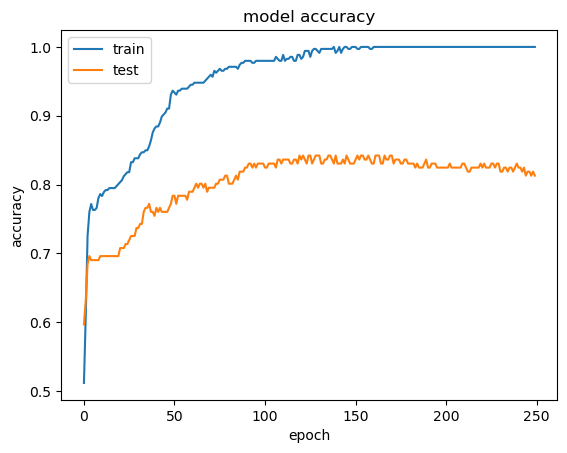

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### The model has low validation accuracy:

In [21]:
# Building a new model with reduced number of hidden layer nodes:

In [22]:
model2=Sequential()
model2.add(Dense(28,  activation='relu'))
model2.add(Dense(14,  activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model2.fit(x, y, validation_split=0.33, epochs=250, batch_size=50)

Epoch 1/250
7/7 [==============================] - 3s 71ms/step - loss: 0.8657 - accuracy: 0.3555 - val_loss: 0.7901 - val_accuracy: 0.4561
Epoch 2/250
7/7 [==============================] - 0s 14ms/step - loss: 0.7804 - accuracy: 0.4682 - val_loss: 0.7287 - val_accuracy: 0.4737
Epoch 3/250
7/7 [==============================] - 0s 15ms/step - loss: 0.7195 - accuracy: 0.5520 - val_loss: 0.6869 - val_accuracy: 0.5556
Epoch 4/250
7/7 [==============================] - 0s 15ms/step - loss: 0.6743 - accuracy: 0.6647 - val_loss: 0.6606 - val_accuracy: 0.5906
Epoch 5/250
7/7 [==============================] - 0s 16ms/step - loss: 0.6433 - accuracy: 0.7283 - val_loss: 0.6444 - val_accuracy: 0.6725
Epoch 6/250
7/7 [==============================] - 0s 14ms/step - loss: 0.6180 - accuracy: 0.7457 - val_loss: 0.6361 - val_accuracy: 0.6959
Epoch 7/250
7/7 [==============================] - 0s 15ms/step - loss: 0.5998 - accuracy: 0.7572 - val_loss: 0.6310 - val_accuracy: 0.7018
Epoch 8/250
7/7 [===

7/7 [==============================] - 0s 13ms/step - loss: 0.2827 - accuracy: 0.8757 - val_loss: 0.6835 - val_accuracy: 0.7544
Epoch 60/250
7/7 [==============================] - 0s 13ms/step - loss: 0.2780 - accuracy: 0.8786 - val_loss: 0.6853 - val_accuracy: 0.7485
Epoch 61/250
7/7 [==============================] - 0s 13ms/step - loss: 0.2744 - accuracy: 0.8815 - val_loss: 0.6844 - val_accuracy: 0.7602
Epoch 62/250
7/7 [==============================] - 0s 13ms/step - loss: 0.2690 - accuracy: 0.8844 - val_loss: 0.6876 - val_accuracy: 0.7544
Epoch 63/250
7/7 [==============================] - 0s 13ms/step - loss: 0.2640 - accuracy: 0.8844 - val_loss: 0.6918 - val_accuracy: 0.7602
Epoch 64/250
7/7 [==============================] - 0s 13ms/step - loss: 0.2591 - accuracy: 0.8844 - val_loss: 0.6938 - val_accuracy: 0.7602
Epoch 65/250
7/7 [==============================] - 0s 13ms/step - loss: 0.2541 - accuracy: 0.8873 - val_loss: 0.6947 - val_accuracy: 0.7719
Epoch 66/250
7/7 [========

7/7 [==============================] - 0s 19ms/step - loss: 0.0818 - accuracy: 0.9884 - val_loss: 0.8481 - val_accuracy: 0.8070
Epoch 118/250
7/7 [==============================] - 0s 16ms/step - loss: 0.0799 - accuracy: 0.9884 - val_loss: 0.8477 - val_accuracy: 0.8070
Epoch 119/250
7/7 [==============================] - 0s 16ms/step - loss: 0.0792 - accuracy: 0.9884 - val_loss: 0.8500 - val_accuracy: 0.8246
Epoch 120/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0767 - accuracy: 0.9913 - val_loss: 0.8605 - val_accuracy: 0.8070
Epoch 121/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0758 - accuracy: 0.9913 - val_loss: 0.8688 - val_accuracy: 0.8012
Epoch 122/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0740 - accuracy: 0.9913 - val_loss: 0.8663 - val_accuracy: 0.8070
Epoch 123/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0722 - accuracy: 0.9913 - val_loss: 0.8621 - val_accuracy: 0.8187
Epoch 124/250
7/7 [=

Epoch 175/250
7/7 [==============================] - 0s 15ms/step - loss: 0.0264 - accuracy: 1.0000 - val_loss: 1.0102 - val_accuracy: 0.8246
Epoch 176/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 1.0167 - val_accuracy: 0.8187
Epoch 177/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 1.0199 - val_accuracy: 0.8187
Epoch 178/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 1.0182 - val_accuracy: 0.8187
Epoch 179/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 1.0202 - val_accuracy: 0.8246
Epoch 180/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 1.0209 - val_accuracy: 0.8304
Epoch 181/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0240 - accuracy: 1.0000 - val_loss: 1.0256 - val_accuracy: 0.8304
Epoch 

Epoch 233/250
7/7 [==============================] - 0s 15ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 1.1630 - val_accuracy: 0.8304
Epoch 234/250
7/7 [==============================] - 0s 15ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 1.1615 - val_accuracy: 0.8304
Epoch 235/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 1.1614 - val_accuracy: 0.8304
Epoch 236/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 1.1682 - val_accuracy: 0.8304
Epoch 237/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 1.1685 - val_accuracy: 0.8304
Epoch 238/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 1.1741 - val_accuracy: 0.8304
Epoch 239/250
7/7 [==============================] - 0s 15ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 1.1788 - val_accuracy: 0.8304
Epoch 

In [23]:
model2.evaluate(x,y)

17/17 [==============================] - 0s 3ms/step - loss: 0.4039 - accuracy: 0.9439


[0.40388062596321106, 0.9439071416854858]

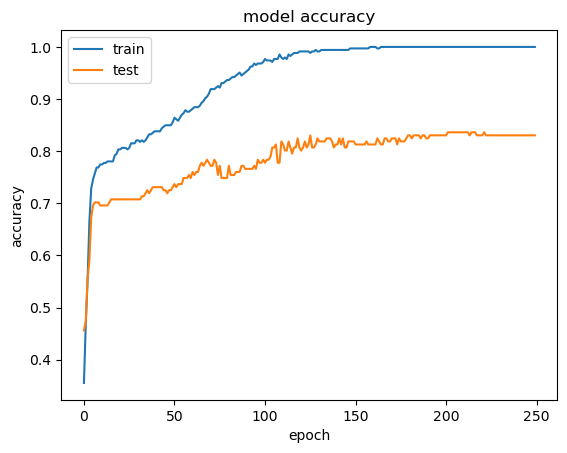

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Validation accuracy didnt improve:

In [25]:
forest_files.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

### Dropping day dummy columns from the data :

In [26]:
x=forest_files.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed','size_category'],axis=1)

In [27]:
y=y=forest_files.iloc[:,-1]

In [28]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,monthapr,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


### Building a new model for the new data:

In [29]:
ss=preprocessing.StandardScaler()
x=ss.fit_transform(x)
y=y.astype('float')
model4=Sequential()
model4.add(Dense(21,  activation='relu'))
model4.add(Dense(15,  activation='relu'))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model4.fit(x, y, validation_split=0.33, epochs=250, batch_size=50)

Epoch 1/250
7/7 [==============================] - 2s 71ms/step - loss: 0.7183 - accuracy: 0.4480 - val_loss: 0.7031 - val_accuracy: 0.5789
Epoch 2/250
7/7 [==============================] - 0s 14ms/step - loss: 0.6703 - accuracy: 0.6185 - val_loss: 0.6699 - val_accuracy: 0.6257
Epoch 3/250
7/7 [==============================] - 0s 14ms/step - loss: 0.6354 - accuracy: 0.7370 - val_loss: 0.6481 - val_accuracy: 0.6082
Epoch 4/250
7/7 [==============================] - 0s 14ms/step - loss: 0.6098 - accuracy: 0.7688 - val_loss: 0.6343 - val_accuracy: 0.6842
Epoch 5/250
7/7 [==============================] - 0s 15ms/step - loss: 0.5888 - accuracy: 0.7746 - val_loss: 0.6269 - val_accuracy: 0.6842
Epoch 6/250
7/7 [==============================] - 0s 16ms/step - loss: 0.5728 - accuracy: 0.7746 - val_loss: 0.6235 - val_accuracy: 0.6842
Epoch 7/250
7/7 [==============================] - 0s 14ms/step - loss: 0.5596 - accuracy: 0.7717 - val_loss: 0.6219 - val_accuracy: 0.6901
Epoch 8/250
7/7 [===

7/7 [==============================] - 0s 19ms/step - loss: 0.2964 - accuracy: 0.8671 - val_loss: 0.5947 - val_accuracy: 0.7895
Epoch 60/250
7/7 [==============================] - 0s 16ms/step - loss: 0.2919 - accuracy: 0.8671 - val_loss: 0.5973 - val_accuracy: 0.7953
Epoch 61/250
7/7 [==============================] - 0s 15ms/step - loss: 0.2878 - accuracy: 0.8699 - val_loss: 0.5992 - val_accuracy: 0.7953
Epoch 62/250
7/7 [==============================] - 0s 14ms/step - loss: 0.2839 - accuracy: 0.8728 - val_loss: 0.6022 - val_accuracy: 0.8012
Epoch 63/250
7/7 [==============================] - 0s 13ms/step - loss: 0.2800 - accuracy: 0.8757 - val_loss: 0.6064 - val_accuracy: 0.8012
Epoch 64/250
7/7 [==============================] - 0s 12ms/step - loss: 0.2743 - accuracy: 0.8757 - val_loss: 0.6078 - val_accuracy: 0.8012
Epoch 65/250
7/7 [==============================] - 0s 13ms/step - loss: 0.2705 - accuracy: 0.8757 - val_loss: 0.6109 - val_accuracy: 0.8012
Epoch 66/250
7/7 [========

7/7 [==============================] - 0s 13ms/step - loss: 0.1092 - accuracy: 0.9624 - val_loss: 0.8537 - val_accuracy: 0.8596
Epoch 118/250
7/7 [==============================] - 0s 14ms/step - loss: 0.1073 - accuracy: 0.9624 - val_loss: 0.8587 - val_accuracy: 0.8596
Epoch 119/250
7/7 [==============================] - 0s 13ms/step - loss: 0.1057 - accuracy: 0.9740 - val_loss: 0.8621 - val_accuracy: 0.8596
Epoch 120/250
7/7 [==============================] - 0s 14ms/step - loss: 0.1043 - accuracy: 0.9711 - val_loss: 0.8570 - val_accuracy: 0.8596
Epoch 121/250
7/7 [==============================] - 0s 14ms/step - loss: 0.1024 - accuracy: 0.9711 - val_loss: 0.8578 - val_accuracy: 0.8655
Epoch 122/250
7/7 [==============================] - 0s 13ms/step - loss: 0.1004 - accuracy: 0.9740 - val_loss: 0.8701 - val_accuracy: 0.8596
Epoch 123/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0989 - accuracy: 0.9740 - val_loss: 0.8746 - val_accuracy: 0.8538
Epoch 124/250
7/7 [=

Epoch 175/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0485 - accuracy: 0.9942 - val_loss: 1.0163 - val_accuracy: 0.8655
Epoch 176/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0475 - accuracy: 0.9942 - val_loss: 1.0144 - val_accuracy: 0.8655
Epoch 177/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0471 - accuracy: 0.9913 - val_loss: 1.0109 - val_accuracy: 0.8655
Epoch 178/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0462 - accuracy: 0.9942 - val_loss: 1.0256 - val_accuracy: 0.8596
Epoch 179/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0456 - accuracy: 0.9942 - val_loss: 1.0274 - val_accuracy: 0.8655
Epoch 180/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0450 - accuracy: 0.9942 - val_loss: 1.0252 - val_accuracy: 0.8655
Epoch 181/250
7/7 [==============================] - 0s 15ms/step - loss: 0.0447 - accuracy: 0.9942 - val_loss: 1.0238 - val_accuracy: 0.8655
Epoch 

Epoch 233/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 1.1180 - val_accuracy: 0.8830
Epoch 234/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 1.1173 - val_accuracy: 0.8772
Epoch 235/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0229 - accuracy: 1.0000 - val_loss: 1.1141 - val_accuracy: 0.8772
Epoch 236/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0229 - accuracy: 1.0000 - val_loss: 1.1143 - val_accuracy: 0.8772
Epoch 237/250
7/7 [==============================] - 0s 17ms/step - loss: 0.0225 - accuracy: 1.0000 - val_loss: 1.1178 - val_accuracy: 0.8772
Epoch 238/250
7/7 [==============================] - 0s 20ms/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 1.1275 - val_accuracy: 0.8830
Epoch 239/250
7/7 [==============================] - 0s 18ms/step - loss: 0.0222 - accuracy: 1.0000 - val_loss: 1.1240 - val_accuracy: 0.8830
Epoch 

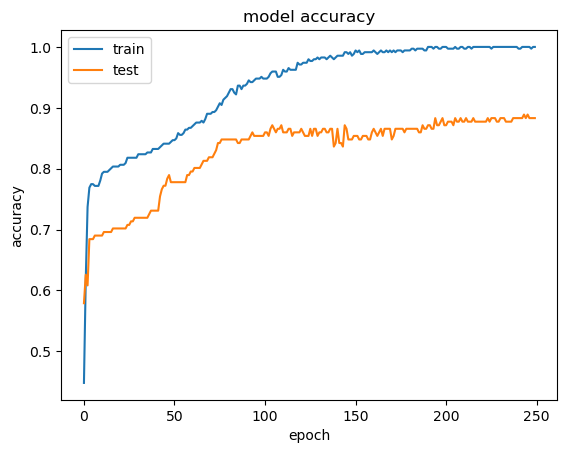

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### From the graph it can be inferred that the validation accuracy improved to 0.91:

In [31]:
# So model4 is taken as the final model:

In [32]:
model_final=model4